In [121]:
using PyPlot
using Integrals

In [ ]:
function gaussienne(x, n0, σ)
    return n0*exp.(-x.^2/(2*σ^2)) / (σ*√(2π))
end


gaussienne (generic function with 1 method)

In [ ]:
# Variables
L = 3e-6
r = [0:1e-7:2*L;]
Ntot = 85e3
Ndrop = Ntot/20 # Approx 20 droplet on the pictures
λ = 421e-9 # In m

# Gaussian parameters
σ = L/4 # L/2 = radius
n0 =  2*Ndrop;

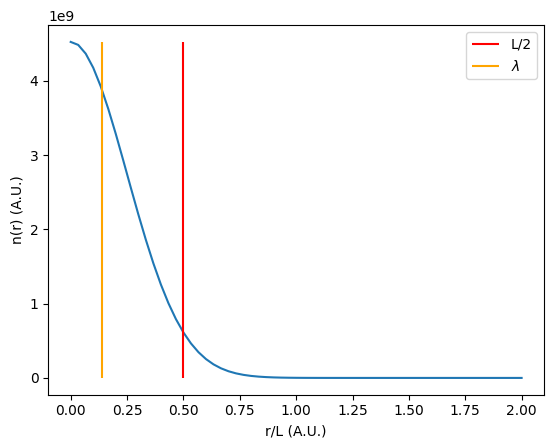

In [149]:
close("all")
figure()
plot(r/L, gaussienne(r, n0, σ))
vlines(ymin=0, ymax=gaussienne(0, n0, σ), 1/2, color="red", label="L/2")
vlines(ymin=0, ymax=gaussienne(0, n0, σ), λ/L, color="orange", label=L"\lambda")
xlabel("r/L (A.U.)")
ylabel("n(r) (A.U.)")
legend()
pygui(false);

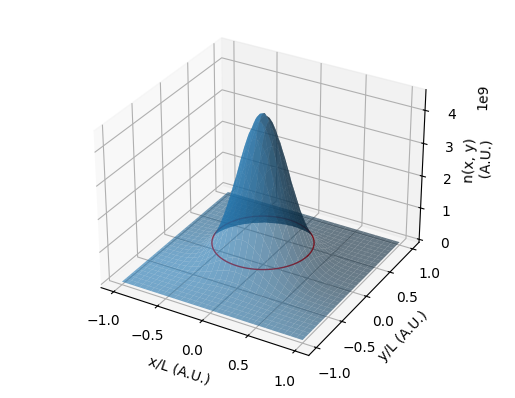

In [ ]:
X, Y = r .-r[end]/2, r .-r[end]/2
X, Y = X' .* ones(length(Y)), ones(length(X))' .* Y

close("all")
figure()
gaussienne_plot(x, y) = gaussienne(sqrt.(x.^2 + y.^2), n0, σ)
axis("off")

plot_surface(X./L, Y./L, gaussienne_plot(X, Y), alpha=0.6)

# Plot a circle at r = L/2
θ = range(0, 2*pi, 100) # Angle range
a = L/2 * cos.(θ)
b = L/2 * sin.(θ)
z = zeros(size(θ)) # For a circle in the x-y plane

plot3D(a./L, b./L, gaussienne(sqrt.(a.^2 + b.^2), n0, σ), color="r", linewidth=1)

xlabel("x/L (A.U.)")
ylabel("y/L (A.U.)")
zlabel("n(x, y)\n (A.U.)")

pygui(false);
# pygui(true);

### Check gaussian values via integration

In [126]:
gaussienne_int(r, p) = gaussienne(r, p[1], p[2])
domain = (0, 10*L) # (lb, ub)
p0 = [n0, σ] 
prob = IntegralProblem(gaussienne_int, domain, p0)
sol = solve(prob, QuadGKJL()).u

4250.000000000001

In [127]:
Ndrop

4250.0

### Maximum density

In [141]:
println("n_max = "*string(gaussienne(0, n0, σ))*"/m")
println("n_max = "*string(gaussienne(0, n0, σ)*λ)*"/λ")

n_max = 4.521345844549571e9/m
n_max = 1903.4866005553695/λ


In [144]:
gaussienne(0, n0, σ)*λ

1903.4866005553695